## Preprocessing

In [1]:
# TODO: comment
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [2]:
# TODO: comment
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
# TODO: comment
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
# TODO: comment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
# TODO: comment
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
# TODO: comment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

count    2.925500e+04
mean     1.182436e-06
std      2.277411e-04
min     -6.055700e-03
25%     -7.369750e-05
50%      7.743100e-07
75%      7.569250e-05
max      3.330400e-03
Name: V3, dtype: float64


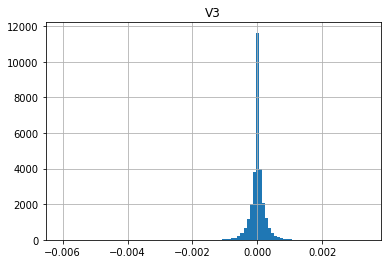

In [29]:
import matplotlib.pyplot as plt
#stats are very different among a few columns
#V3

print(df['V3'].describe())
df['V3'].hist(bins=100)
plt.title('V3')
plt.show()

count    29255.000000
mean         0.001774
std          0.036425
min         -0.130630
25%         -0.020205
50%          0.013157
75%          0.024576
max          0.068515
Name: V7, dtype: float64


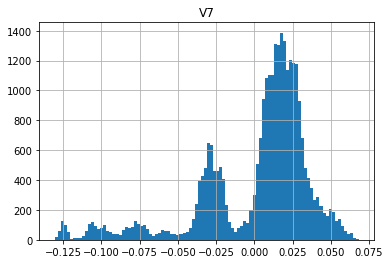

In [30]:
#V7
print(df['V7'].describe())
df['V7'].hist(bins=100)
plt.title('V7')
plt.show()

count    29255.000000
mean         7.417750
std         12.113144
min         -0.581230
25%          1.475700
50%          3.297900
75%          8.364350
max        312.520000
Name: V38, dtype: float64


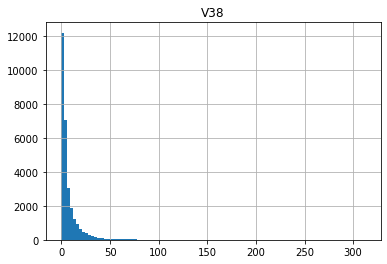

In [31]:
#V38
print(df['V38'].describe())
df['V38'].hist(bins=100)
plt.title('V38')
plt.show()

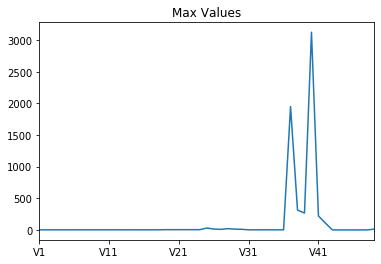

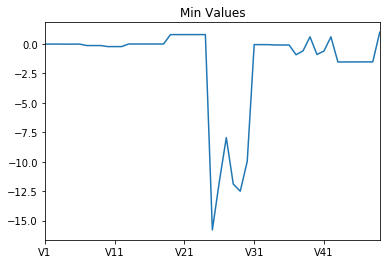

In [32]:
#min max value visualizer
headers=list(df)

#maximum values
df.max().plot()
plt.title('Max Values')
plt.xticks()
plt.show()
#minimum values
df.min().plot()
plt.title('Min Values')
plt.show()

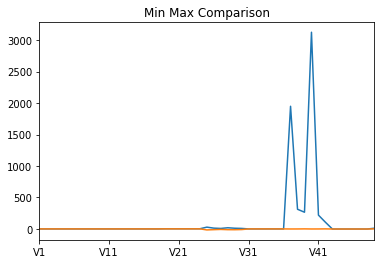

In [33]:
#combined
df.max().plot()
df.min().plot()
plt.title('Min Max Comparison')
plt.show()

## Newer Solution for testing NN-Configuration

In [9]:
# Imports for class
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt    
import itertools
        

""" 
    The following class helps in streamlining the building, training, and testing of a Neural Network (NN)
    With it, we can see the effect on the result for changing a single parameter 
    So we only have to provide the name of the parameter we have to change, and the values we want to test it with
"""
class NeuralNetworkParameterTester:

    # The config holds all the changeable parameters for building, training and testing the NN
    parameter_config = {
                'number_of_hidden_layers': [1],
                'number_of_units_per_hidden_layer': [10],
                'epochs': [100],
                'batch_size': [64],
                'activation_function': ['relu'],
                'loss_function': ['categorical_crossentropy'],
                'optimizer': ['sgd']}
    
    # Result of the test
    result = []
    
    """ 
        If you want to test your parameters, then you have to call this class
    """       
    def run(self):
        
        # Reset result
        self.result = []
        
        # Build all possible parameter combinations and  ...
        for config in self.__get_all_config_combinations():
            # ... build the NN-model for it
            model = self.__build(config)
            # ... train the NN-model 
            trained_model, history = self.__train(config, model)
            # ... test the NN-model and get the accuracy score
            accuracy = self.__test(trained_model)

            # Save the result
            self.result.append({'parameter_config': config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})
            
    """ 
        The following method builds all combinations of your parameter-config
    """          
    def __get_all_config_combinations(self):

        raw_combinations = list(itertools.product(*(self.parameter_config[parameter] for parameter in self.parameter_config)))

        config_combinations_list = []
        for combination in raw_combinations:
            c = {
                'number_of_hidden_layers': combination[0],
                'number_of_units_per_hidden_layer': combination[1],
                'epochs': combination[2],
                'batch_size': combination[3],
                'activation_function': combination[4],
                'loss_function': combination[5],
                'optimizer': combination[6]}
            
            config_combinations_list.append(c)
        
        return config_combinations_list
    
    """ 
        The following method builds the NN-Model
    """   
    def __build(self, config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Building of input layer
        model.add(Dense(config['number_of_units_per_hidden_layer'], 
                        input_dim=48, 
                        activation=config['activation_function']))
        # Building of hidden layer(s)
        for i in range(config['number_of_hidden_layers']):
            model.add(Dense(config['number_of_units_per_hidden_layer'], 
                            activation=config['activation_function'], use_bias=True))
        # Building of output layer
        model.add(Dense(11, activation="softmax"))
        # ?
        model.compile(loss=config['loss_function'], 
                      optimizer=config['optimizer'], 
                      metrics=['accuracy'])
        return model
    
    """ 
        The following method trains the NN-Model
    """   
    def __train(self, config, model):
        # xtrain and ytrain is the data from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=config['epochs'], 
                            batch_size=config['batch_size'])  
        
        return model, history
    
    """ 
        The following method tests the NN-Model
    """ 
    # TODO: look at this method more closely. So far just copy paste
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        # TODO: calculate confusion matrix and put it in result
        return accuracy
                                    
                                    
    #--------------- Setter methods for setting parameters --------------------------------------#
    
    def set_number_of_hidden_layers(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_hidden_layers"] = val
        else:
            self.parameter_config["number_of_hidden_layers"] = [val]
        
    def set_number_of_units_per_hidden_layer(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_units_per_hidden_layer"] = val
        else:
            self.parameter_config["number_of_units_per_hidden_layer"] = [val]
        
    def set_activation_function(self, val):
        if isinstance(val, list):
            self.parameter_config["activation_function"] = val
        else:
            self.parameter_config["activation_function"] = [val]
        
    def set_epochs(self, val):
        if isinstance(val, list):
            self.parameter_config["epochs"] = val
        else:
            self.parameter_config["epochs"] = [val]
        
    def set_batch_size(self, val):
        if isinstance(val, list):
            self.parameter_config["batch_size"] = val
        else:
            self.parameter_config["batch_size"] = [val]
        
    def set_loss_function(self, val):
        if isinstance(val, list):
            self.parameter_config["loss_function"] = val
        else:
            self.parameter_config["loss_function"] = [val]
        
    def set_optimizer(self, val):
        if isinstance(val, list):
            self.parameter_config["optimizer"] = val
        else:
            self.parameter_config["optimizer"] = [val]
        
    #--------------- Resets the config to default values --------------------------------------#
    
    def reset_config(self):
        parameter_config = {
            'number_of_hidden_layers': [1],
            'number_of_units_per_hidden_layer': [10],
            'epochs': [100],
            'batch_size': [64],
            'activation_function': ['relu'],
            'loss_function': ['categorical_crossentropy'],
            'optimizer': ['sgd']}
        
        self.parameter_config = parameter_config
        
        
    #--------------- Helper methods -----------------------------------------------------------#
        
    def __get_number_of_params_with_multiple_vals(self):
        number_of_params_with_multiple_vals = 0 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                number_of_params_with_multiple_vals += 1
        return number_of_params_with_multiple_vals
    
    def __get_param_names_with_multiple_vals(self):
        param_names_with_multiple_vals = [] 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                param_names_with_multiple_vals.append(key)
        return param_names_with_multiple_vals
        
        
    #--------------- Plotter methods -----------------------------------------------------------#
    
    def plot_result(self):
        
        number_of_params_with_multiple_vals = self.__get_number_of_params_with_multiple_vals()
        param_names_with_multiple_vals = self.__get_param_names_with_multiple_vals()
        
        if number_of_params_with_multiple_vals == 1:
            self.__plot_2d(param_names_with_multiple_vals[0])
        elif number_of_params_with_multiple_vals == 2:
            self.__plot_3d(param_names_with_multiple_vals)
        else:
            print("Plotting for this result is not supported")
            # TODO PCA?
        
    def __plot_2d(self, param_name_with_multiple_vals):

        param_vals = [element['parameter_config'][param_name_with_multiple_vals] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(param_vals, accuracy_result)
        plt.plot(param_vals, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + param_name_with_multiple_vals + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(param_name_with_multiple_vals)
        plt.show()
        
        print("\n\n")
        
        df = pd.DataFrame(list(zip(param_vals, accuracy_result)), 
               columns =[param_name_with_multiple_vals, 'Accuracy']) 
        print(df)
        
        
    # TODO sis  
    def __plot_3d(self, param_name_with_multiple_vals):

        pass

Using TensorFlow backend.


## Test NN with parameters

In [20]:
#model plot 
from keras.utils import plot_model

model = nnpt.result[0]['result']['model']

plot_model(model, to_file='model.png', show_shapes=True)

![title](model.png)

In [10]:
nnpt = NeuralNetworkParameterTester()

In [11]:
nnpt.parameter_config

{'number_of_hidden_layers': [1],
 'number_of_units_per_hidden_layer': [10],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [12]:
nnpt.set_number_of_hidden_layers([2, 4, 8])

In [13]:
nnpt.parameter_config

{'number_of_hidden_layers': [2, 4, 8],
 'number_of_units_per_hidden_layer': [10],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [14]:
nnpt.run()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





26329/26329 [==============================] - 1s 41us/step - loss: 2.3109 - acc: 0.1288
Epoch 2/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.0718 - acc: 0.2364
Epoch 3/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.7574 - acc: 0.3238
Epoch 4/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.4019 - acc: 0.4361
Epoch 5/100
26329/26329 [==============================] - 0s 15us/step - loss: 1.1122 - acc: 0.5454
Epoch 6/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.9190 - acc: 0.6295
Epoch 7/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.7661 - acc: 0.7061
Epoch 8/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.6270 - acc: 0.7652
Epoch 9/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.511

26329/26329 [==============================] - 0s 17us/step - loss: 0.1121 - acc: 0.9645
Epoch 54/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.1116 - acc: 0.9640
Epoch 55/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.1105 - acc: 0.9655
Epoch 56/100
26329/26329 [==============================] - 0s 16us/step - loss: 0.1099 - acc: 0.9651
Epoch 57/100
26329/26329 [==============================] - 0s 16us/step - loss: 0.1080 - acc: 0.9658
Epoch 58/100
26329/26329 [==============================] - 0s 16us/step - loss: 0.1074 - acc: 0.9645
Epoch 59/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1070 - acc: 0.9654
Epoch 60/100
26329/26329 [==============================] - 0s 16us/step - loss: 0.1060 - acc: 0.9657
Epoch 61/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1066 - acc: 0.9656
Epoch 62/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1052 - acc: 

26329/26329 [==============================] - 0s 17us/step - loss: 0.2899 - acc: 0.8994
Epoch 34/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2612 - acc: 0.9063
Epoch 35/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2494 - acc: 0.9123
Epoch 36/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2453 - acc: 0.9103
Epoch 37/100
26329/26329 [==============================] - 0s 19us/step - loss: 0.2352 - acc: 0.9166
Epoch 38/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2258 - acc: 0.9221
Epoch 39/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2195 - acc: 0.9228
Epoch 40/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2126 - acc: 0.9261
Epoch 41/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2044 - acc: 0.9306
Epoch 42/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.2033 - acc: 

26329/26329 [==============================] - 1s 22us/step - loss: 1.2165 - acc: 0.4572
Epoch 14/100
26329/26329 [==============================] - 1s 23us/step - loss: 1.0794 - acc: 0.5005
Epoch 15/100
26329/26329 [==============================] - 1s 22us/step - loss: 0.9956 - acc: 0.5309
Epoch 16/100
26329/26329 [==============================] - 1s 22us/step - loss: 0.9675 - acc: 0.5546
Epoch 17/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.8702 - acc: 0.5758
Epoch 18/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.7942 - acc: 0.6014
Epoch 19/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.7667 - acc: 0.6152
Epoch 20/100
26329/26329 [==============================] - 1s 24us/step - loss: 0.7219 - acc: 0.6442
Epoch 21/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.6953 - acc: 0.6706
Epoch 22/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.6586 - acc: 

26329/26329 [==============================] - 1s 21us/step - loss: 0.1272 - acc: 0.9583
Epoch 94/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1267 - acc: 0.9593
Epoch 95/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1208 - acc: 0.9594
Epoch 96/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1198 - acc: 0.9618
Epoch 97/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1369 - acc: 0.9577
Epoch 98/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1191 - acc: 0.9628
Epoch 99/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.1203 - acc: 0.9631
Epoch 100/100
26329/26329 [==============================] - 1s 20us/step - loss: 0.1143 - acc: 0.9639


In [15]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20eca4e8dc8>,
   'accuracy': 0.9647983595352017}},
 {'parameter_config': {'number_of_hidden_layers': 4,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20ebe196a48>,
   'accuracy': 0.929254955570745}},
 {'parameter_config': {'number_of_hidden_layers': 8,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Seq

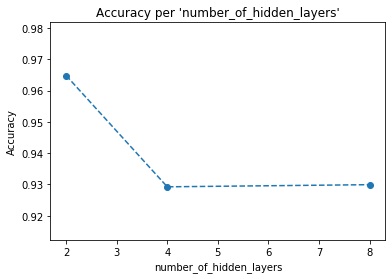




   number_of_hidden_layers  Accuracy
0                        2  0.964798
1                        4  0.929255
2                        8  0.929938


In [16]:
nnpt.plot_result()

In [17]:
nnpt.reset_config()

In [19]:
nnpt.set_number_of_units_per_hidden_layer([10, 20, 48])
nnpt.set_number_of_hidden_layers(2)

In [20]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [10, 20, 48],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [21]:
nnpt.run()

Epoch 1/100
26329/26329 [==============================] - 1s 37us/step - loss: 2.3866 - acc: 0.1269
Epoch 2/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.1236 - acc: 0.2184
Epoch 3/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.8122 - acc: 0.2969
Epoch 4/100
26329/26329 [==============================] - 0s 19us/step - loss: 1.5278 - acc: 0.3869
Epoch 5/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2908 - acc: 0.4600
Epoch 6/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.1125 - acc: 0.5289
Epoch 7/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.9772 - acc: 0.5889
Epoch 8/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.8578 - acc: 0.6454
Epoch 9/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7405 - acc: 0.7072
Epoch 10/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.6167 - a

26329/26329 [==============================] - 0s 18us/step - loss: 0.1207 - acc: 0.9604
Epoch 82/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.1198 - acc: 0.9622
Epoch 83/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.1180 - acc: 0.9630
Epoch 84/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1177 - acc: 0.9614
Epoch 85/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1166 - acc: 0.9623
Epoch 86/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1163 - acc: 0.9616
Epoch 87/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.1146 - acc: 0.9631
Epoch 88/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1141 - acc: 0.9633
Epoch 89/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1123 - acc: 0.9641
Epoch 90/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.1111 - acc: 

26329/26329 [==============================] - 0s 18us/step - loss: 0.0771 - acc: 0.9756
Epoch 62/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.0760 - acc: 0.9766
Epoch 63/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.0751 - acc: 0.9761
Epoch 64/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.0749 - acc: 0.9765
Epoch 65/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.0733 - acc: 0.9772
Epoch 66/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.0738 - acc: 0.9772
Epoch 67/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.0727 - acc: 0.9774
Epoch 68/100
26329/26329 [==============================] - 0s 19us/step - loss: 0.0717 - acc: 0.9781
Epoch 69/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.0711 - acc: 0.9772
Epoch 70/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.0703 - acc: 

26329/26329 [==============================] - 1s 23us/step - loss: 0.0645 - acc: 0.9800
Epoch 42/100
26329/26329 [==============================] - 1s 22us/step - loss: 0.0634 - acc: 0.9809
Epoch 43/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0619 - acc: 0.9817
Epoch 44/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0610 - acc: 0.9812
Epoch 45/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0594 - acc: 0.9821
Epoch 46/100
26329/26329 [==============================] - 1s 22us/step - loss: 0.0581 - acc: 0.9818
Epoch 47/100
26329/26329 [==============================] - 1s 22us/step - loss: 0.0567 - acc: 0.9830
Epoch 48/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0559 - acc: 0.9833
Epoch 49/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0552 - acc: 0.9837
Epoch 50/100
26329/26329 [==============================] - 1s 20us/step - loss: 0.0536 - acc: 

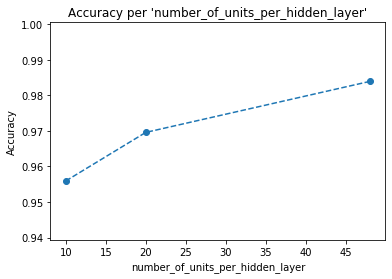




   number_of_units_per_hidden_layer  Accuracy
0                                10  0.955913
1                                20  0.969583
2                                48  0.983937


In [22]:
nnpt.plot_result()

In [23]:
nnpt.reset_config()
nnpt.set_number_of_hidden_layers(2)
nnpt.set_number_of_units_per_hidden_layer(48)
nnpt.set_epochs([50, 100, 200])

In [24]:
nnpt.run()

Epoch 1/50
26329/26329 [==============================] - 1s 45us/step - loss: 2.2510 - acc: 0.2056
Epoch 2/50
26329/26329 [==============================] - 1s 21us/step - loss: 1.7719 - acc: 0.3784
Epoch 3/50
26329/26329 [==============================] - 1s 21us/step - loss: 1.2870 - acc: 0.5479
Epoch 4/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.9225 - acc: 0.6846
Epoch 5/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.6557 - acc: 0.7858
Epoch 6/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.4721 - acc: 0.8450
Epoch 7/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3679 - acc: 0.8776
Epoch 8/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3058 - acc: 0.8989
Epoch 9/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.2655 - acc: 0.9107
Epoch 10/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.2369 - acc: 0.9207

26329/26329 [==============================] - 1s 24us/step - loss: 0.0819 - acc: 0.9741
Epoch 32/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.0796 - acc: 0.9752
Epoch 33/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.0775 - acc: 0.9756
Epoch 34/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.0751 - acc: 0.9757
Epoch 35/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.0726 - acc: 0.9779
Epoch 36/100
26329/26329 [==============================] - 1s 23us/step - loss: 0.0713 - acc: 0.9775
Epoch 37/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0704 - acc: 0.9780
Epoch 38/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0682 - acc: 0.9789
Epoch 39/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0665 - acc: 0.9794
Epoch 40/100
26329/26329 [==============================] - 1s 21us/step - loss: 0.0643 - acc: 

26329/26329 [==============================] - 1s 23us/step - loss: 0.1985 - acc: 0.9333
Epoch 12/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.1833 - acc: 0.9395
Epoch 13/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.1711 - acc: 0.9433
Epoch 14/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.1602 - acc: 0.9470
Epoch 15/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.1504 - acc: 0.9518
Epoch 16/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.1417 - acc: 0.9554
Epoch 17/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.1348 - acc: 0.9579
Epoch 18/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.1291 - acc: 0.9604
Epoch 19/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.1234 - acc: 0.9622
Epoch 20/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.1181 - acc: 

26329/26329 [==============================] - 1s 22us/step - loss: 0.0254 - acc: 0.9944
Epoch 92/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0252 - acc: 0.9944
Epoch 93/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0247 - acc: 0.9945
Epoch 94/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0242 - acc: 0.9943
Epoch 95/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0237 - acc: 0.9950
Epoch 96/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0233 - acc: 0.9948
Epoch 97/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0232 - acc: 0.9946
Epoch 98/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0234 - acc: 0.9947
Epoch 99/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0227 - acc: 0.9952
Epoch 100/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0222 - acc:

26329/26329 [==============================] - 1s 23us/step - loss: 0.0114 - acc: 0.9983
Epoch 171/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0111 - acc: 0.9985
Epoch 172/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0112 - acc: 0.9983
Epoch 173/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0109 - acc: 0.9987
Epoch 174/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0106 - acc: 0.9985
Epoch 175/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0107 - acc: 0.9986
Epoch 176/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0105 - acc: 0.9987
Epoch 177/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0106 - acc: 0.9984
Epoch 178/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0107 - acc: 0.9983
Epoch 179/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.010

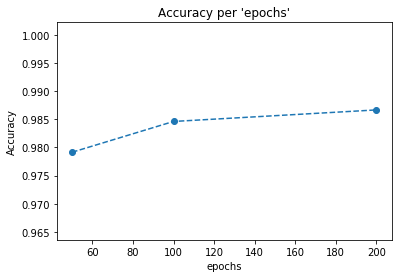




   epochs  Accuracy
0      50  0.979152
1     100  0.984621
2     200  0.986671


In [25]:
nnpt.plot_result()

In [27]:
nnpt.set_number_of_units_per_hidden_layer([48, 64, 128])
nnpt.set_epochs(200)
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 1s 53us/step - loss: 2.0882 - acc: 0.2783
Epoch 2/200
26329/26329 [==============================] - 1s 24us/step - loss: 1.4450 - acc: 0.5014
Epoch 3/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.9539 - acc: 0.6813
Epoch 4/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.6482 - acc: 0.7872
Epoch 5/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.4792 - acc: 0.8471
Epoch 6/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3827 - acc: 0.8749
Epoch 7/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3224 - acc: 0.8936
Epoch 8/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.2801 - acc: 0.9093
Epoch 9/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.2490 - acc: 0.9197
Epoch 10/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.2239 - a

26329/26329 [==============================] - 1s 22us/step - loss: 0.0356 - acc: 0.9901
Epoch 81/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0356 - acc: 0.9899: 0s - loss: 0.0375 - acc
Epoch 82/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0345 - acc: 0.9904
Epoch 83/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0341 - acc: 0.9907
Epoch 84/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0342 - acc: 0.9906
Epoch 85/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0335 - acc: 0.9908
Epoch 86/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0330 - acc: 0.9910
Epoch 87/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0330 - acc: 0.9905
Epoch 88/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0328 - acc: 0.9909
Epoch 89/200
26329/26329 [==============================] - 1s 27us/st

26329/26329 [==============================] - 1s 23us/step - loss: 0.0173 - acc: 0.9966
Epoch 160/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0169 - acc: 0.9964
Epoch 161/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0171 - acc: 0.9962
Epoch 162/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0166 - acc: 0.9971
Epoch 163/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0171 - acc: 0.9966
Epoch 164/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0170 - acc: 0.9967
Epoch 165/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0164 - acc: 0.9967
Epoch 166/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0166 - acc: 0.9967
Epoch 167/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0162 - acc: 0.9968
Epoch 168/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.016

26329/26329 [==============================] - 1s 23us/step - loss: 0.0612 - acc: 0.9820
Epoch 39/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0599 - acc: 0.9830
Epoch 40/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0585 - acc: 0.9832
Epoch 41/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0573 - acc: 0.9828
Epoch 42/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0559 - acc: 0.9834
Epoch 43/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0552 - acc: 0.9834
Epoch 44/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0534 - acc: 0.9845
Epoch 45/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0520 - acc: 0.9846
Epoch 46/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0512 - acc: 0.9852
Epoch 47/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0500 - acc: 

26329/26329 [==============================] - 1s 23us/step - loss: 0.0186 - acc: 0.9960
Epoch 119/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0185 - acc: 0.9962
Epoch 120/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0182 - acc: 0.9961
Epoch 121/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0184 - acc: 0.9960
Epoch 122/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0180 - acc: 0.9964
Epoch 123/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0177 - acc: 0.9961
Epoch 124/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0176 - acc: 0.9962
Epoch 125/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0174 - acc: 0.9964
Epoch 126/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0172 - acc: 0.9964
Epoch 127/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.017

26329/26329 [==============================] - 1s 26us/step - loss: 0.0101 - acc: 0.9985
Epoch 198/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0100 - acc: 0.9985
Epoch 199/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0100 - acc: 0.9985
Epoch 200/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0098 - acc: 0.9987
Epoch 1/200
26329/26329 [==============================] - 2s 66us/step - loss: 2.0054 - acc: 0.2944
Epoch 2/200
26329/26329 [==============================] - 1s 31us/step - loss: 1.3112 - acc: 0.5647
Epoch 3/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.8342 - acc: 0.7232
Epoch 4/200
26329/26329 [==============================] - 1s 30us/step - loss: 0.5616 - acc: 0.8213
Epoch 5/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.4082 - acc: 0.8751
Epoch 6/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.3214 - acc: 0.9

26329/26329 [==============================] - 1s 31us/step - loss: 0.0248 - acc: 0.9951
Epoch 78/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0243 - acc: 0.9949
Epoch 79/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0243 - acc: 0.9951
Epoch 80/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0236 - acc: 0.9954
Epoch 81/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0234 - acc: 0.9953
Epoch 82/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0230 - acc: 0.9953
Epoch 83/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0231 - acc: 0.9952
Epoch 84/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0224 - acc: 0.9959
Epoch 85/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0221 - acc: 0.9954
Epoch 86/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0220 - acc: 

26329/26329 [==============================] - 1s 29us/step - loss: 0.0120 - acc: 0.9989
Epoch 157/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0120 - acc: 0.9989
Epoch 158/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0122 - acc: 0.9989
Epoch 159/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0119 - acc: 0.9987
Epoch 160/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0121 - acc: 0.9987
Epoch 161/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0117 - acc: 0.9990
Epoch 162/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0118 - acc: 0.9989
Epoch 163/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0116 - acc: 0.9990
Epoch 164/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0118 - acc: 0.9986
Epoch 165/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.011

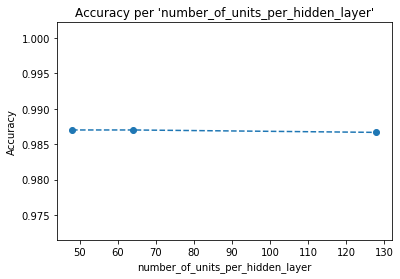




   number_of_units_per_hidden_layer  Accuracy
0                                48  0.987013
1                                64  0.987013
2                               128  0.986671


In [28]:
nnpt.plot_result()

In [34]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [48, 64, 128],
 'epochs': [200],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [35]:
nnpt.set_number_of_units_per_hidden_layer(48)
nnpt.set_loss_function(['mean_squared_error', 'categorical_crossentropy'])

In [36]:
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 1s 54us/step - loss: 0.0840 - acc: 0.1082
Epoch 2/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0834 - acc: 0.1215
Epoch 3/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0829 - acc: 0.1310
Epoch 4/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0824 - acc: 0.1412
Epoch 5/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0817 - acc: 0.1427
Epoch 6/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0810 - acc: 0.1400
Epoch 7/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0802 - acc: 0.1374
Epoch 8/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0795 - acc: 0.1351
Epoch 9/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0787 - acc: 0.1343
Epoch 10/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0781 - a

26329/26329 [==============================] - 1s 21us/step - loss: 0.0517 - acc: 0.5823
Epoch 82/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0513 - acc: 0.5898
Epoch 83/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0508 - acc: 0.5986
Epoch 84/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0503 - acc: 0.6069
Epoch 85/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0498 - acc: 0.6164
Epoch 86/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0493 - acc: 0.6239
Epoch 87/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0488 - acc: 0.6326
Epoch 88/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0482 - acc: 0.6406
Epoch 89/200
26329/26329 [==============================] - 1s 20us/step - loss: 0.0477 - acc: 0.6489
Epoch 90/200
26329/26329 [==============================] - 1s 20us/step - loss: 0.0471 - acc: 

26329/26329 [==============================] - 1s 22us/step - loss: 0.0164 - acc: 0.8990
Epoch 161/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0162 - acc: 0.8998
Epoch 162/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0160 - acc: 0.9009
Epoch 163/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0159 - acc: 0.9020
Epoch 164/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0157 - acc: 0.9029
Epoch 165/200
26329/26329 [==============================] - 1s 20us/step - loss: 0.0156 - acc: 0.9035
Epoch 166/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0154 - acc: 0.9051
Epoch 167/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0153 - acc: 0.9060
Epoch 168/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0151 - acc: 0.9065
Epoch 169/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.015

26329/26329 [==============================] - 1s 24us/step - loss: 0.0598 - acc: 0.9823
Epoch 41/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0582 - acc: 0.9829
Epoch 42/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0571 - acc: 0.9833
Epoch 43/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0554 - acc: 0.9847
Epoch 44/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0542 - acc: 0.9844
Epoch 45/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0530 - acc: 0.9846
Epoch 46/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0517 - acc: 0.9850
Epoch 47/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0506 - acc: 0.9857
Epoch 48/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0496 - acc: 0.9856
Epoch 49/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0483 - acc: 

26329/26329 [==============================] - 1s 25us/step - loss: 0.0187 - acc: 0.9958
Epoch 121/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0182 - acc: 0.9963
Epoch 122/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0182 - acc: 0.9962
Epoch 123/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0181 - acc: 0.9963
Epoch 124/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0180 - acc: 0.9959
Epoch 125/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0177 - acc: 0.9962
Epoch 126/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0175 - acc: 0.9963
Epoch 127/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0173 - acc: 0.9963
Epoch 128/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0174 - acc: 0.9964
Epoch 129/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.017

26329/26329 [==============================] - 1s 25us/step - loss: 0.0099 - acc: 0.9987
Epoch 200/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0100 - acc: 0.9985


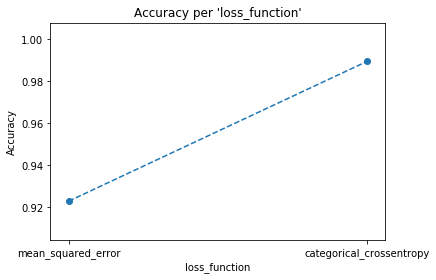




              loss_function  Accuracy
0        mean_squared_error  0.922761
1  categorical_crossentropy  0.989405


In [37]:
nnpt.plot_result()

In [41]:
nnpt.set_loss_function('categorical_crossentropy')
nnpt.set_optimizer(['sgd', 'adam'])
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [48],
 'epochs': [200],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd', 'adam']}

In [42]:
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 2s 65us/step - loss: 2.0664 - acc: 0.2611
Epoch 2/200
26329/26329 [==============================] - 1s 25us/step - loss: 1.4981 - acc: 0.4716
Epoch 3/200
26329/26329 [==============================] - 1s 25us/step - loss: 1.0372 - acc: 0.6570
Epoch 4/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.6847 - acc: 0.7777
Epoch 5/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.4820 - acc: 0.8403
Epoch 6/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3705 - acc: 0.8767
Epoch 7/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3039 - acc: 0.9009
Epoch 8/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2600 - acc: 0.9145
Epoch 9/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2290 - acc: 0.9254
Epoch 10/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2056 - a

26329/26329 [==============================] - 1s 26us/step - loss: 0.0324 - acc: 0.9913
Epoch 82/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0314 - acc: 0.9914
Epoch 83/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0314 - acc: 0.9916
Epoch 84/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0305 - acc: 0.9916
Epoch 85/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0304 - acc: 0.9920
Epoch 86/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0299 - acc: 0.9917
Epoch 87/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0301 - acc: 0.9916
Epoch 88/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0292 - acc: 0.9919
Epoch 89/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0288 - acc: 0.9925
Epoch 90/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0284 - acc: 

26329/26329 [==============================] - 1s 25us/step - loss: 0.0145 - acc: 0.9977
Epoch 161/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0145 - acc: 0.9976
Epoch 162/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0145 - acc: 0.9977
Epoch 163/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0142 - acc: 0.9979
Epoch 164/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0142 - acc: 0.9977
Epoch 165/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0140 - acc: 0.9977
Epoch 166/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0139 - acc: 0.9980
Epoch 167/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0137 - acc: 0.9979
Epoch 168/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0136 - acc: 0.9980
Epoch 169/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.013

26329/26329 [==============================] - 1s 27us/step - loss: 0.0135 - acc: 0.9972
Epoch 41/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0171 - acc: 0.9958
Epoch 42/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0197 - acc: 0.9948
Epoch 43/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0189 - acc: 0.9954
Epoch 44/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0192 - acc: 0.9953
Epoch 45/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0143 - acc: 0.9964
Epoch 46/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0159 - acc: 0.9965
Epoch 47/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0222 - acc: 0.9937
Epoch 48/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0140 - acc: 0.9963
Epoch 49/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0153 - acc: 

26329/26329 [==============================] - 1s 27us/step - loss: 0.0133 - acc: 0.9974
Epoch 121/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0070 - acc: 0.9993
Epoch 122/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0074 - acc: 0.9992
Epoch 123/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0078 - acc: 0.9991
Epoch 124/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0188 - acc: 0.9967
Epoch 125/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0098 - acc: 0.9984
Epoch 126/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0105 - acc: 0.9982
Epoch 127/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0105 - acc: 0.9981 ETA: 0s - loss: 0.0157 
Epoch 128/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0142 - acc: 0.9973
Epoch 129/200
26329/26329 [==============================] - 1s

26329/26329 [==============================] - 1s 27us/step - loss: 0.0141 - acc: 0.9972
Epoch 200/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0082 - acc: 0.9988


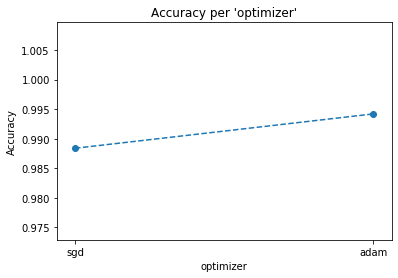




  optimizer  Accuracy
0       sgd   0.98838
1      adam   0.99419


In [43]:
nnpt.plot_result()

In [44]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 48,
   'epochs': 200,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20eb5f37088>,
   'accuracy': 0.9883800410116199}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 48,
   'epochs': 200,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'adam'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20e87068fc8>,
   'accuracy': 0.99419002050581}}]